In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt


In [2]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
device = "cuda" if torch.cuda.is_available() else "cpu"


In [3]:
torch.__version__

'2.0.1+cu117'

In [4]:
# create known parameters
weight = 0.7
bias = 0.3

#Create data

start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [5]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [6]:
def plot_predictions(x_train, y_train, x_test, y_test, predictions = None):

    """
    Plots training data, test data and compares predictions.
    """
    plt.figure(figsize=(6,4))

    plt.scatter(x_train, y_train, c = 'b' , s=4, label = 'Train data')
    plt.scatter(x_test, y_test, c = 'g', s=4, label='Testing data')

    if predictions is not None: 
        plt.scatter(x_test, predictions, c = 'r', s=4, label= 'Predictions')

    plt.legend(prop={'size': 14})   

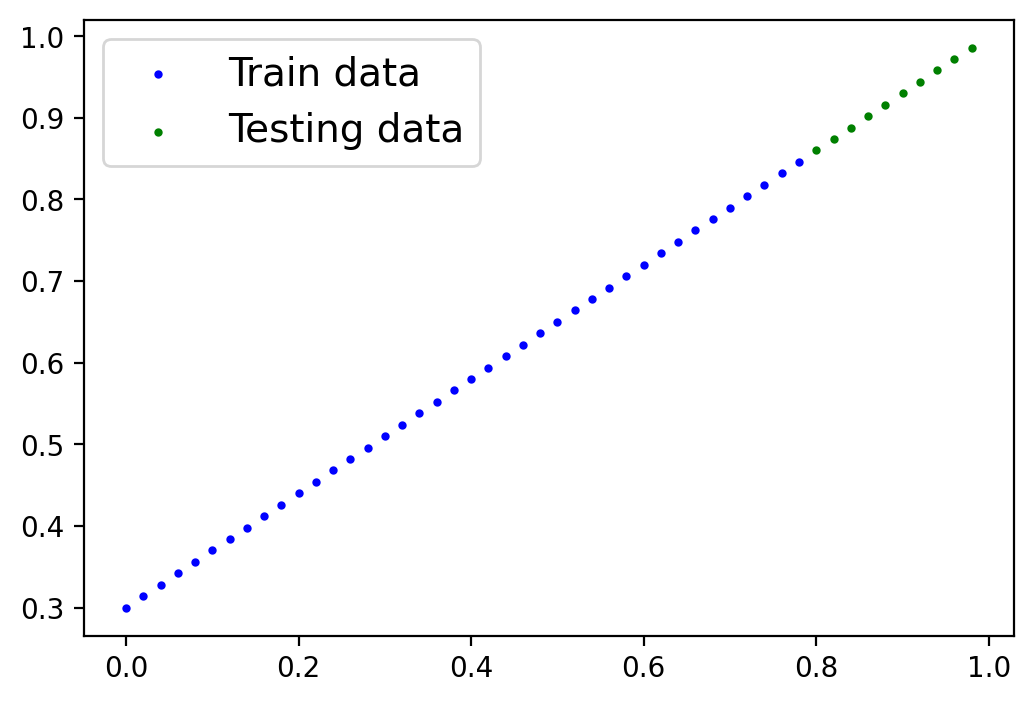

In [7]:
plot_predictions(X_train, y_train, X_test, y_test)

## 2. Build model

In [8]:
class LinearRegressionModel(nn.Module):

    def __init__(self):

        super().__init__()

        self.bias = nn.Parameter(torch.randn(1, dtype = torch.float), requires_grad=True)
        self.weights = nn.Parameter(torch.randn(1, dtype = torch.float), requires_grad=True)


    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias


In [9]:
torch.manual_seed(42)

model_0 = LinearRegressionModel()

list(model_0.parameters())



[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [10]:
model_0.state_dict()

OrderedDict([('bias', tensor([0.3367])), ('weights', tensor([0.1288]))])

In [11]:
with torch.inference_mode():
    y_preds = model_0(X_test)

In [12]:
# Check the predictions
print(f"Number of testing samples: {len(X_test)}") 
print(f"Number of predictions made: {len(y_preds)}")
print(f"Predicted values:\n{y_preds}")

Number of testing samples: 10
Number of predictions made: 10
Predicted values:
tensor([[0.4397],
        [0.4423],
        [0.4449],
        [0.4475],
        [0.4500],
        [0.4526],
        [0.4552],
        [0.4578],
        [0.4603],
        [0.4629]])


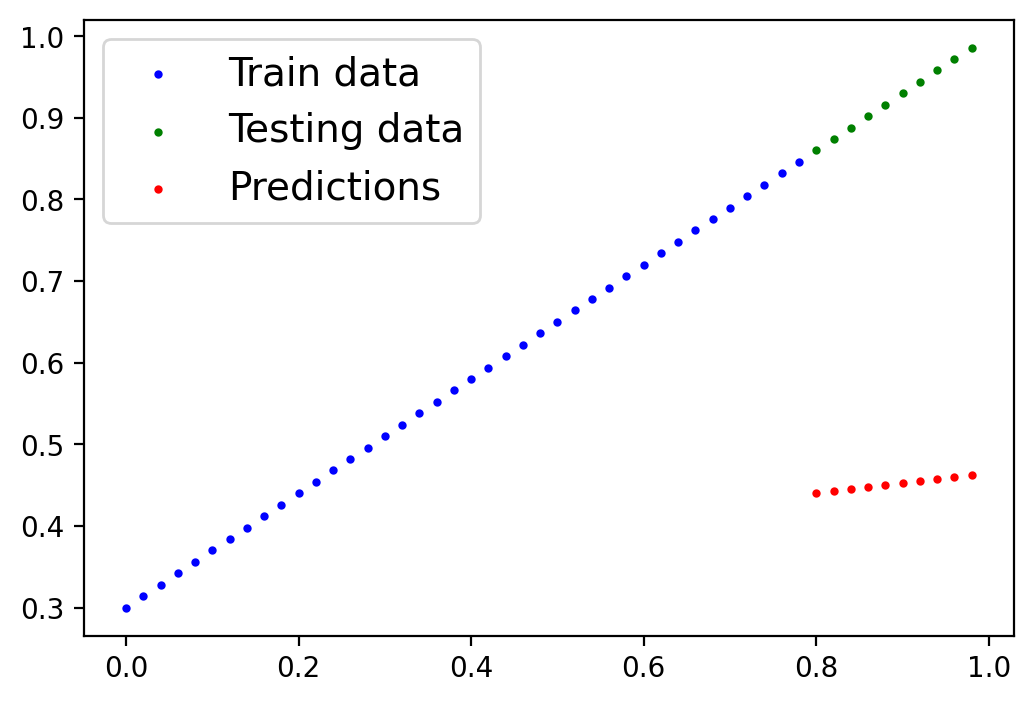

In [13]:
plot_predictions(X_train, y_train, X_test, y_test, predictions=y_preds)

In [14]:
y_test - y_preds

tensor([[0.4203],
        [0.4317],
        [0.4431],
        [0.4545],
        [0.4660],
        [0.4774],
        [0.4888],
        [0.5002],
        [0.5117],
        [0.5231]])

## 3. Train model

In [15]:
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)

In [17]:
torch.manual_seed(42)

epochs = 200

train_loss_values = []
test_loss_values = []
epoch_count = []


for epoch in range(epochs):

    model_0.train()

    y_pred = model_0(X_train)

    loss = loss_fn(y_pred, y_train)
    print(loss)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    model_0.eval()

    with torch.inference_mode():

        test_pred = model_0(X_test)

        test_loss = loss_fn(test_pred, y_test.type(torch.float))

        if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            # print(f'Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss {test_loss}')


tensor(0.0345, grad_fn=<MeanBackward0>)
tensor(0.0342, grad_fn=<MeanBackward0>)
tensor(0.0338, grad_fn=<MeanBackward0>)
tensor(0.0335, grad_fn=<MeanBackward0>)
tensor(0.0332, grad_fn=<MeanBackward0>)
tensor(0.0328, grad_fn=<MeanBackward0>)
tensor(0.0325, grad_fn=<MeanBackward0>)
tensor(0.0321, grad_fn=<MeanBackward0>)
tensor(0.0318, grad_fn=<MeanBackward0>)
tensor(0.0314, grad_fn=<MeanBackward0>)
tensor(0.0311, grad_fn=<MeanBackward0>)
tensor(0.0308, grad_fn=<MeanBackward0>)
tensor(0.0304, grad_fn=<MeanBackward0>)
tensor(0.0301, grad_fn=<MeanBackward0>)
tensor(0.0297, grad_fn=<MeanBackward0>)
tensor(0.0294, grad_fn=<MeanBackward0>)
tensor(0.0290, grad_fn=<MeanBackward0>)
tensor(0.0287, grad_fn=<MeanBackward0>)
tensor(0.0284, grad_fn=<MeanBackward0>)
tensor(0.0280, grad_fn=<MeanBackward0>)
tensor(0.0277, grad_fn=<MeanBackward0>)
tensor(0.0273, grad_fn=<MeanBackward0>)
tensor(0.0270, grad_fn=<MeanBackward0>)
tensor(0.0266, grad_fn=<MeanBackward0>)
tensor(0.0263, grad_fn=<MeanBackward0>)


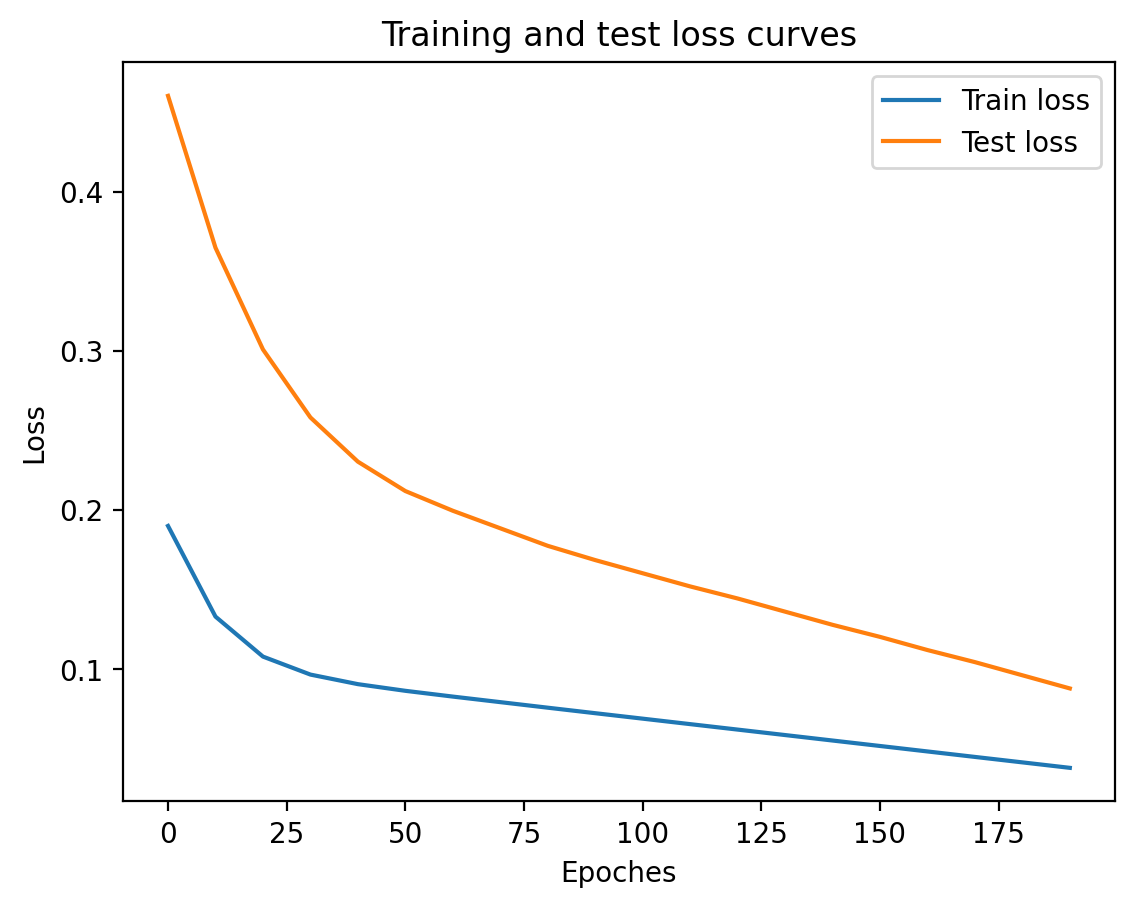

In [17]:
plt.plot(epoch_count, train_loss_values, label = 'Train loss')
plt.plot(epoch_count, test_loss_values, label = 'Test loss')
plt.title('Training and test loss curves')
plt.ylabel('Loss')
plt.xlabel('Epoches')
plt.legend();

In [18]:
model_0.state_dict(), (weight, bias)

(OrderedDict([('bias', tensor([0.3722])), ('weights', tensor([0.5282]))]),
 (0.7, 0.3))

In [19]:
with torch.inference_mode():
    prediction = model_0(X_test)

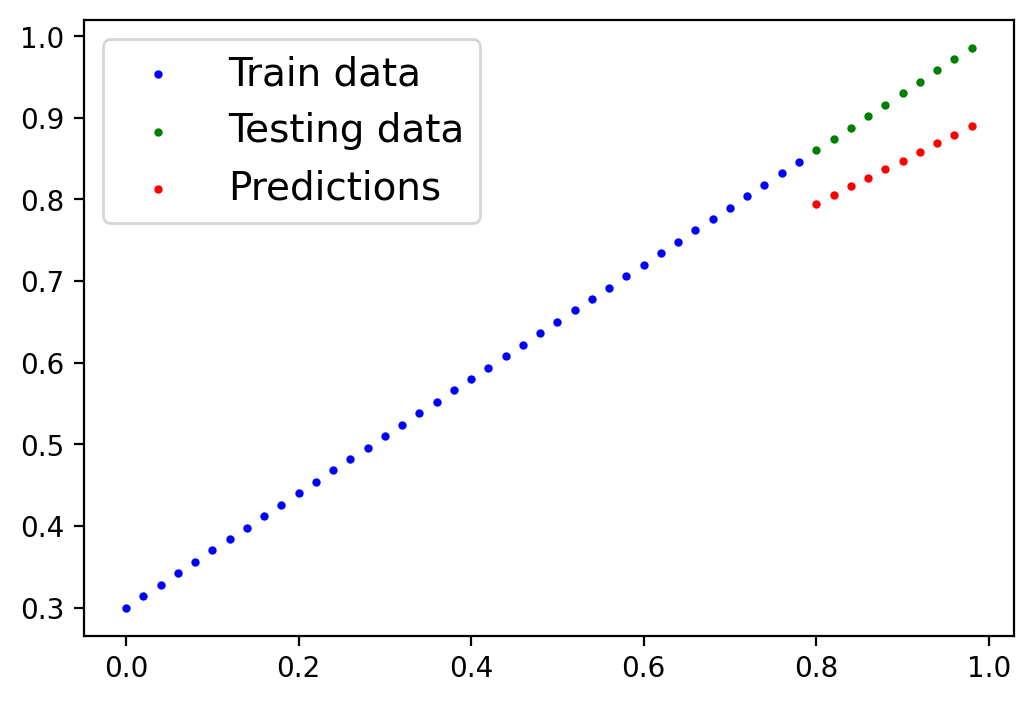

In [20]:
plot_predictions(X_train, y_train, X_test, y_test, predictions=prediction)

In [21]:
model_0.state_dict()

OrderedDict([('bias', tensor([0.3722])), ('weights', tensor([0.5282]))])

## Save models

In [22]:
from pathlib import Path

In [23]:
MODEL_PATH = Path("models")
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME

In [24]:
torch.save(obj=model_0.state_dict(), f= MODEL_SAVE_PATH)

In [30]:
loaded_model_1 = LinearRegressionModel()
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))
loaded_model_1.to(device)

LinearRegressionModel()

In [34]:
X_test_gpu = X_test.to(device)

In [38]:
with torch.inference_mode():
    y_pred_from_load = loaded_model_1(X_test_gpu)


In [39]:
y_pred_from_load

tensor([[0.7948],
        [0.8053],
        [0.8159],
        [0.8265],
        [0.8370],
        [0.8476],
        [0.8582],
        [0.8687],
        [0.8793],
        [0.8898]], device='cuda:0')

In [43]:
prediction

tensor([[0.7948],
        [0.8053],
        [0.8159],
        [0.8265],
        [0.8370],
        [0.8476],
        [0.8582],
        [0.8687],
        [0.8793],
        [0.8898]])